## <center> Vizuelizacija podataka u programskom jeziku Julia upotrebom biblioteke VegaLite.jl </center>

VegaLite.jl je Julia biblioteka koja se koristi u svrhu vizuelizacije podataka. Pomenuta biblioteka upotrebljava VegaLite sintaksu, koja nije svojstvena isključivo Julia programskom jeziku, već je primenom deklarativne JSON sintakse koju biblioteka koristi, omogućeno implementiranje iste u okviru različitih tehnologija (programskih jezika).

In [8]:
using Pkg
using VegaLite
using Distributions
using DataFrames
using Random

- Pozivom funkcije seed koja je definisana u Random paketu obezbeđujemo da se svakim pozivom funkcije rand (koja je upotrebljena kao pomoćna funkcija za generisanje nezavisnih vrednosti) generišu iste nasumične vrednosti
- Nezavisna promenljiva (eng. independent) će sadržati realne vrednosti počevši od 0.0 pa sve do 9.9, sa povećanjem u koracima od 0.1 (ukupno 100 vrednosti)
- Zavisna promenljiva (eng. dependent) će biti formirana pomoću funkcije rand koja će generisati 100 nasumičnih vrednosti u opsegu od 0.0 do 1.0 i pokomponentno ih dodati nizu nezavisnih vrednosti, odnosno nezavisnoj promenljivoj 

In [10]:
Random.seed!(12)
independent = 0:0.1:9.9
dependent = independent .+ rand(length(independent));

- Atribut mark @vlplot markoa, određuje koji tip grafika je u pitanju. Pošto smo stavili :point kao vrednost koju prosleđujemo mark parametru u pitanju će biti rasuti (eng. scatter) grafik.
- Kolor određuje boju tačaka na grafiku
- Parametru x prosleđuje se promenljiva koja čije vrednosti predstavljaju koordinate x ose, a analogno ovome, promenljivoj y se prosleđuje promenljiva čije će vrednosti biti koordinate y ose.
- Parametrima width i height određuje se veličina grafika.

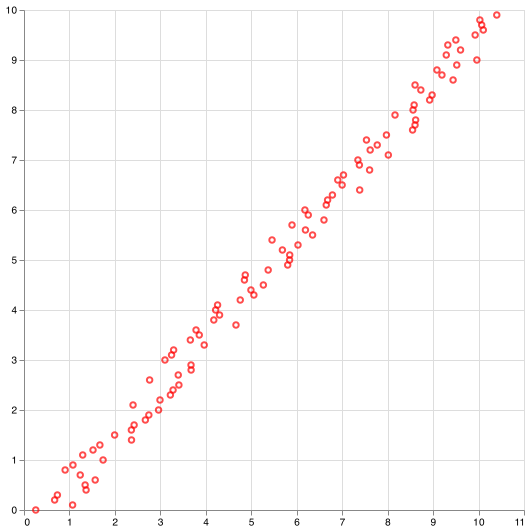

In [54]:
@vlplot(
    mark = {:point, color = :red},
    x = dependent,
    y = independent,
    width = 500,
    height = 500
)

Pozivom rand funkcije i prosleđivanjem polja od dva elementa ("Yes" i "No") kao prvog argumenta i broja 100 kao drugog argumenta, pomenuta funkcija će generisati 100 nasumično odabranih vrednosti i y prosleđenog niza. Ovim postižemo generisanje kategoričkog atributa koji može predstavljati klase u DataFrame-u.

In [11]:
group = rand(["Yes", "No"], 100);

Rasuti (eng. scatter) grafički prikaz opservacija prikazuje iste kao tačke u dvodimenzionalnom prostoru, odnosno, korektnije rečeno, ravni. X i y parametrima prosleđuju se koordinate opservacija koje želimo da prikažemo. Međutim, radi boljeg vizuelnog doživljaja, možemo poželeti da svaku opservaciju (tačku) prikažemo različitim bojama, u zavisnosti od klase kojoj data opservacija pripada.
U kodu ispod, parametru color prosleđena je promenljiva koja sadrži oznake klasa kojima opservacije pripadaju. Na osnovu pripadnosti klasama, VegaLite biblioteka će označiti opservacije različitim bojama. Biblioteka će uvesti onoliko boja koliko ima različitih klasa (vrednosti) u promenljivoj koja se prosleđuje color parametru. Legenda, koja se nalazi u gornjem desnom uglu grafika, prikazuje koja klasa je kodirana kojom bojom.

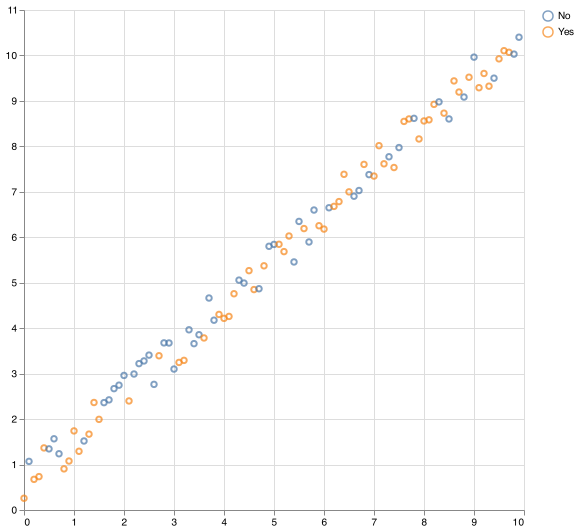

In [56]:
@vlplot(
    mark = :point,
    x = independent,
    y = dependent,
    color = group,
    width = 500,
    height = 500
)

Ukoliko color parametar zamenimo column parametrom, VegaLite biblioteka će to shvatiti kao da želimo da se najpre izvrši grupisanje podataka na osnovu vrednosti koje se nalaze u vektoru koji se prosleđuje column parametru, a nakon toga prikaže rasuti grafik svake grupe individualno. Budući da vektor koji prosleđujemo column parametru sadrži samo dve vrednosti ("Yes" i "No"), VegaLite biblioteka će generisati dva grafika.

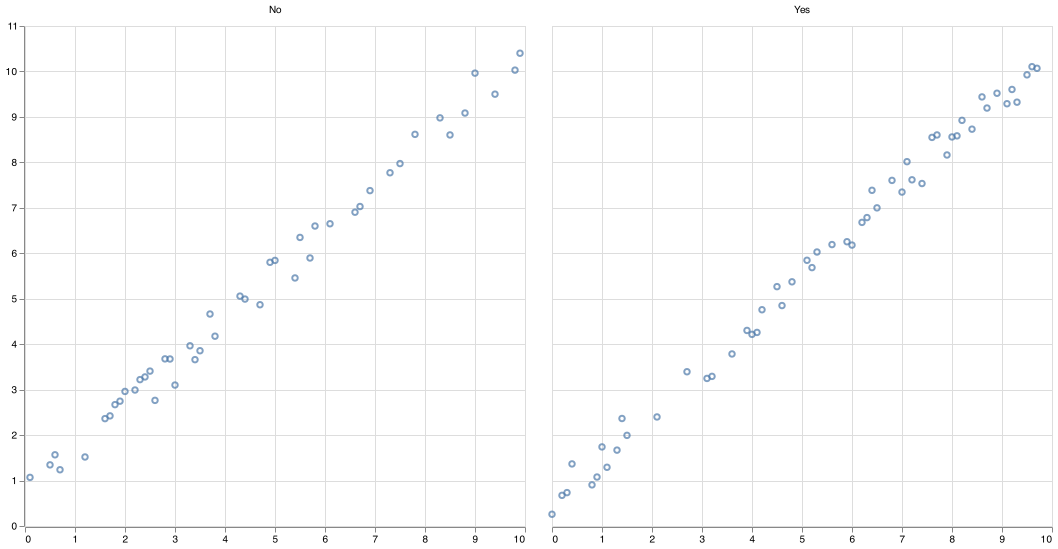

In [57]:
@vlplot(
    mark = :point,
    x = independent,
    y = dependent,
    column = group,
    width = 500,
    height = 500
)

- Funkcijom rand kojoj prosleđujemo raspon 10:20 kao prvi argument i 100 kao drugi argument, postižemo generisanje niza koji sadrži 100 elemenata. Svaki element se bira nasumično u opsegu od 10 do 20.
- Pozivom funkcije rand u drugoj liniji koda i prosleđivanjem vektora koji sadrži tri elementa (1, 2, 3) na mestu prvog argumenta, i vrednosti 100 na mestu drugog argumenta, postiže se generisanje vektora koji sadrži 100 elemenata. Svaki element se nasumično bira u vektoru koji je naveden kao prvi argument.

In [12]:
scale = rand(10:20, 100);
grade = rand([1, 2, 3], 100);

U kodu ispod, kreiran je DataFrame objekat koji sadrži kolone: Independent, Dependent, Grade, Scale i Group. Jedino je promenljiva Group kategorička (u tabeli ispod koja štampa DataFrame nakon formiranja istog mogu se videti i tipovi odgovarajućih kolona, kao i da vrednosti kolone Group DataFrame tretira kao String).

In [13]:
df = DataFrame(
    Independent = independent,
    Dependent = dependent,
    Grade = grade,
    Scale = scale,
    Group = group
);

first(df, 10)

,Independent,Dependent,Grade,Scale,Group
,Float64,Float64,Int64,Int64,String
1,0.0,0.25851,2,13,Yes
2,0.1,1.06925,1,11,No
3,0.2,0.674177,2,19,Yes
4,0.3,0.734506,2,14,Yes
5,0.4,1.36579,2,13,Yes
6,0.5,1.34484,1,20,No
7,0.6,1.56636,1,11,No
8,0.7,1.23726,1,15,No
9,0.8,0.904797,3,20,Yes


Vektori koji se prosleđuju kao argumenti parametrima x i y makrou @vlplot biblioteke VegaLite ne moraju biti "zasebni" nizovi. Operatorom |> možemo postići da se DataFrame objekat (objekat koji smo kreirali u ćeliji iznad) prosledi makrou, a kao argumente parametrima x i y makroa prosledimo kolone koje se nalaze u DataFrame objektu. Parametru x, prosleđena je kolona Independent, a parametru y kolona Dependent DataFrame objekta.

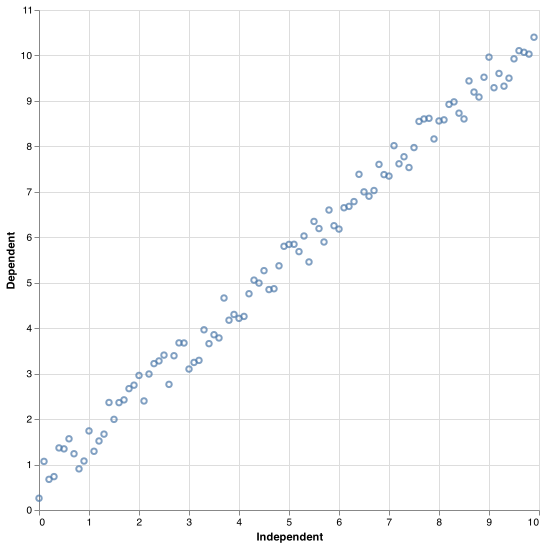

In [83]:
df |> @vlplot(
    mark = :point,
    x = :Independent,
    y = :Dependent,
    width = 500,
    height = 500
)

Parametrom color, možemo postići da se tačke na grafiku prikažu željenom bojom.

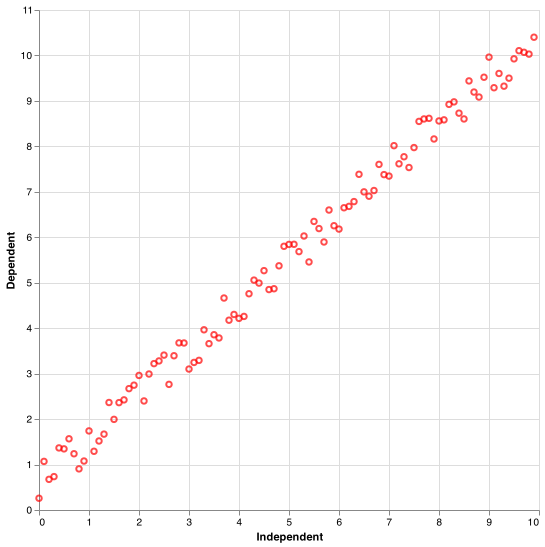

In [73]:
df |> @vlplot(
    mark = {:point, color="red"},
    x = :Independent,
    y = :Dependent,
    width = 500,
    height = 500
)

Parametrom background možemo postaviti željenu boju podloge grafika.

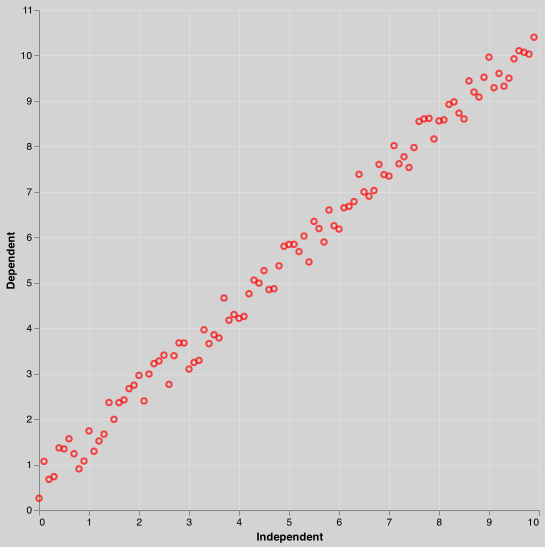

In [75]:
df |> @vlplot(
    background = "lightgray",
    mark = {:point, color="red"},
    x = :Independent,
    y = :Dependent,
    width = 500,
    height = 500
)

Takođe, nazive kolona DataFrame objekta koje želimo da prosledimo x i y parametrima možemo navoditi kao stringove, za razliku od primera iznad, gde smo nazive kolona navodili preko simbola.  

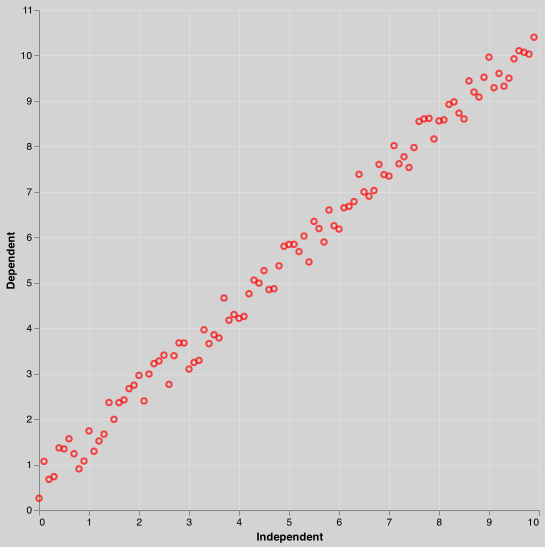

In [76]:
df |> @vlplot(
    background = "lightgray",
    mark = {:point, color="red"},
    x = "Independent",
    y = "Dependent",
    width = 500,
    height = 500
)

Prosleđivanje stringa title parametru, obezbeđujemo željeni naslov grafika koji će se štampati na vrhu istog. Takođe, svakoj osi možemo dodeliti naziv tako što navedemo parametar title unitar vitičastih zagrada x, odnosno y parametra.

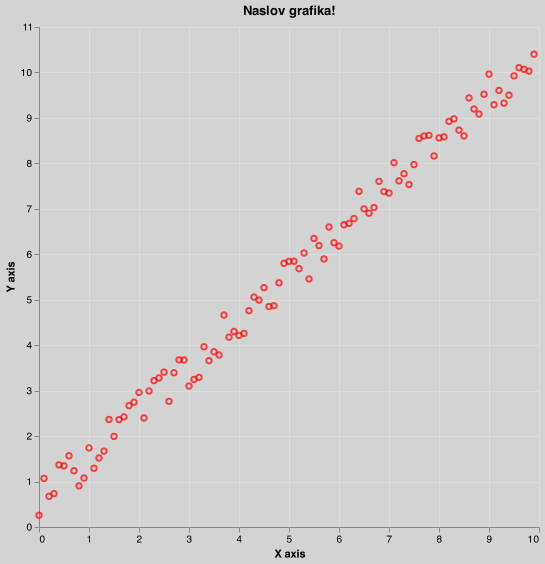

In [78]:
df |> @vlplot(
    background = "lightgray",
    mark = {:point, color="red"},
    x = {:Independent, title = "X axis"},
    y = {:Dependent, title = "Y axis"},
    title = "Naslov grafika!",
    width = 500,
    height = 500
)

Prosleđivanjem odgovarajućeg naziva kolone color parametru @vlplot makroa, obaveštavamo VegaLite biblioteku da označena kolona sadrži oznake klase opservacija. Broj različitih vrednosti unutar navedene kolone ujedno označava i broj klasa. VegaLite biblioteka će dodeliti onoliko različitih boja opservacijama prilikom prikazivanja istih na grafiku koliko ima različitih klasa.

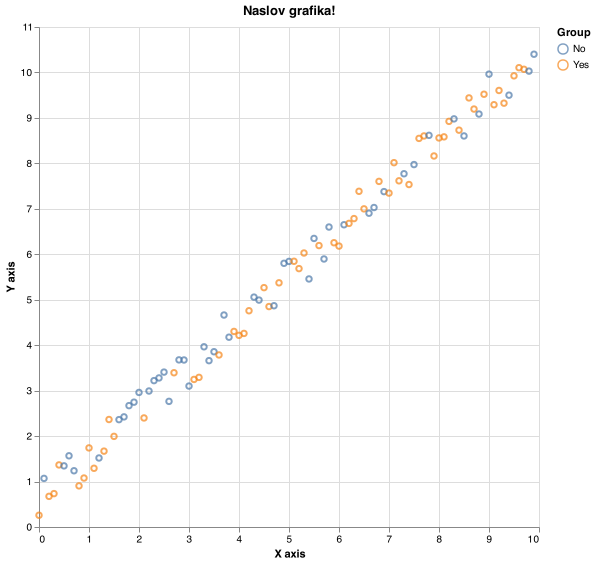

In [80]:
df |> @vlplot(
    mark = {:point, color="red"},
    x = {:Independent, title = "X axis"},
    y = {:Dependent, title = "Y axis"},
    color = :Group,
    title = "Naslov grafika!",
    width = 500,
    height = 500
)

Ukoliko atributu color prosledimo kolonu koja je numeričkog tipa (u slučaju ispod prosleđena je kolona Grade koju DataFrame prepoznaje kao Int64), na desnoj strani grafika će se umesto legende koja označava klase pripadnosti opservacija prikazati numerička skala i nijanse boje, koje predstavljaju različite vrednosti. Što je vrednost u koloni opservacije Grade veća, to je boja na skali tamnija i tačka koja predstavlja opservaciju na grafiku tamnije boje.

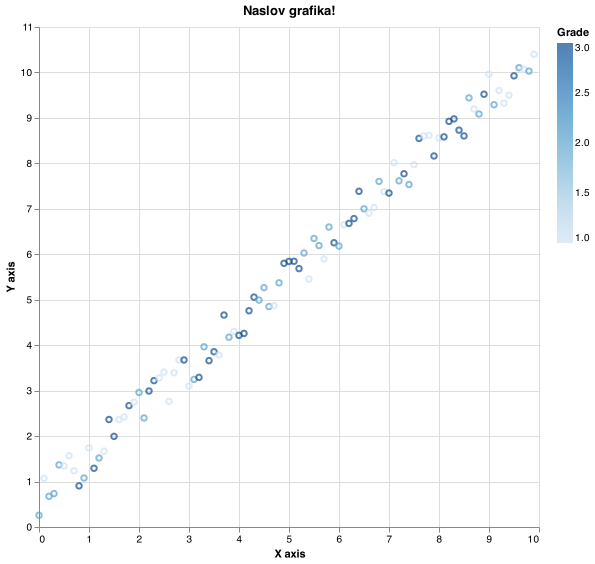

In [81]:
df |> @vlplot(
    mark = {:point, color="red"},
    x = {:Independent, title = "X axis"},
    y = {:Dependent, title = "Y axis"},
    color = :Grade,
    title = "Naslov grafika!",
    width = 500,
    height = 500
)

Oznaka :n u atributu color = "Grade:n" označava da želimo da se Grade kolona posmatra kao nominalni artibut, iako taj atribut DataFrame prepoznaje kao numerički (Int64). Sada će se umesto brojne skale na desnoj strani grafika naći legenda koja pokazuje kojom bojom je kodirana svaka odgovarajuća klasa prosleđena u atributu Grade.

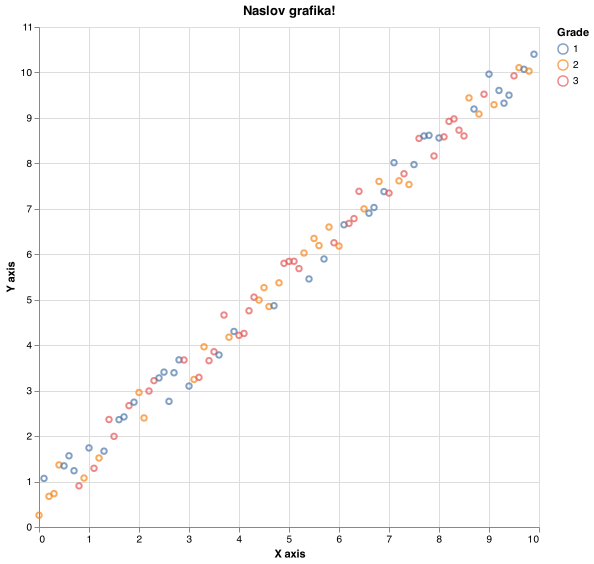

In [82]:
df |> @vlplot(
    mark = {:point, color="red"},
    x = {:Independent, title = "X axis"},
    y = {:Dependent, title = "Y axis"},
    color = "Grade:n",
    title = "Naslov grafika!",
    width = 500,
    height = 500
)

U primeru ispod, prikazana su dodatna podešavanja koja demonstriraju koliko je VegaLite biblioteka fleksibilna po pitanju detaljnih prilagođavanja grafika potrebama.
- Naslovu grafika dodeljena je plava boja
- Ispod naslova dodat je i podnaslov, postavljena željena boja i navedena veličina slova u pikselima
- Isključene su mreže (eng. grids), tako da sada grafik više ne prikazuje horizontalne i vertikalne linije na svojoj površini
- X i y osama je pored dodatih naslova promenjena i podrazumevana boja

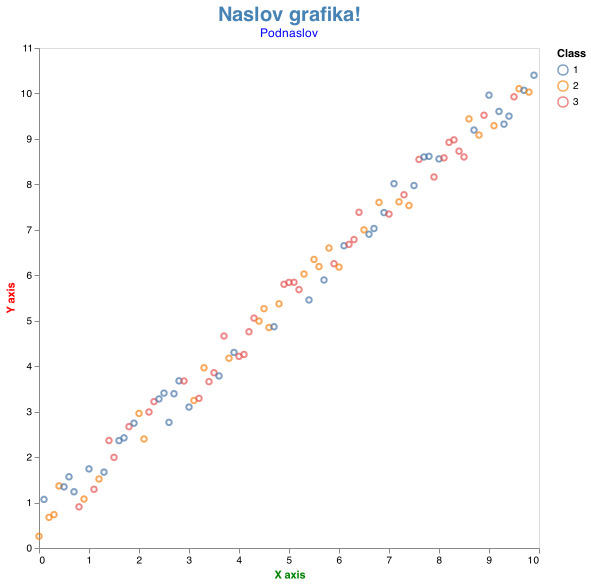

In [115]:
df |> @vlplot(
    mark = {:point, color="red"},
    x = {field = :Independent, axis = {title = "X axis", titleColor = "green", grid = false}},
    y = {field = :Dependent, axis= {title = "Y axis", titleColor = "red", grid = false}},
    color = {"Grade:n", legend = {title = "Class"}},
    title = {text = "Naslov grafika!", color = "steelblue", fontSize = 20, subtitle = "Podnaslov", subtitleColor = "blue"},
    width = 500,
    height = 500
)

Formalniji način navođenja argumenata koje želimo da prosledimo makrou je zasebnim navođenjem mark parametra, kao i zasebnim navođenjem encoding parametra. Parametrima x i y možemo putem parametra field na formalniji način dodeliti kolonu DataFrame objekta, parametrom title odrediti tekst kojim će biti označene ose, a parametrom type eksplicitno definisati tip kojim želimo da VegaLite biblioteka posmatra navedene kolone.

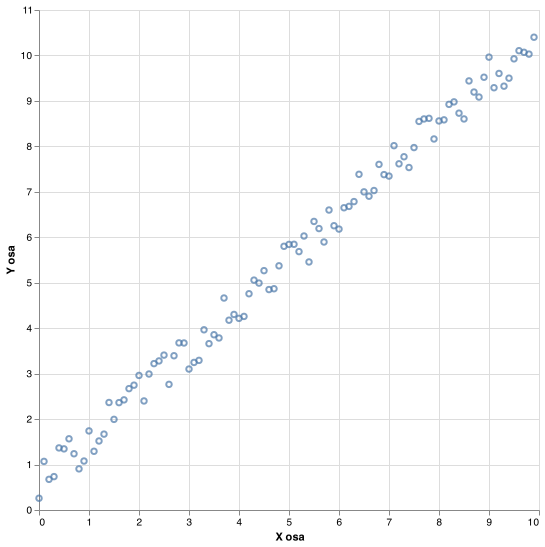

In [88]:
df |> @vlplot(
    mark = :point,
    encoding = {x = {field = :Independent, title = "X osa", type = :quantitative}, 
                y = {field = :Dependent, title = "Y osa", type = :quantitative}},
    width = 500,
    height = 500
)

### <center> Bar grafik </center>

U primeru ispod, prikazan je bar grafik, koji je upotrebljen u svrhu grafičkog prikaza broja pojavljivanja vrednosti u okviru Group kategoričke promenljive. Na grafiku se mogu videti dva "štapića", koja ukazuju na to da se u okviru navedene promenljive pojavljuju samo dve različite vrednosti. Ove vrednosti su označene na x osi (Yes i No), dok je na y osi prikazan broj pojavljivanja navedenih vrednosti u okviru promenljive.

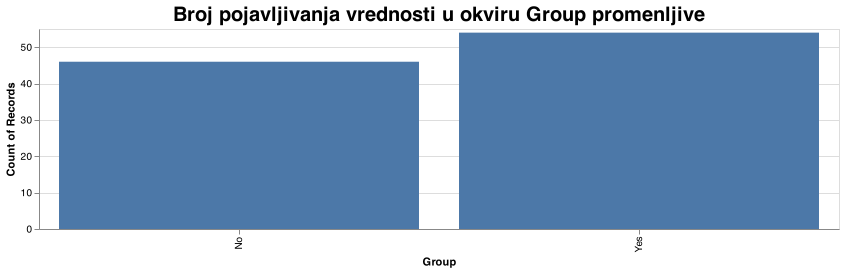

In [14]:
df |> @vlplot(
    mark = :bar,
    x = :Group,
    y = "count()",
    title = {text = "Broj pojavljivanja vrednosti u okviru Group promenljive", fontSize = 20},
    width = 800,
    heigth = 800
)

Oznake na x osi kategoričkih promenljivih VegaLite biblioteka podrazumevano prikazuje rotirane za 90 stepeni. Jednostavnim dodavanjem labelAngle atributa i postavljanjem istog na 0 obezbeđujemo da oznake na x osi budu prikazane vodoravno. 

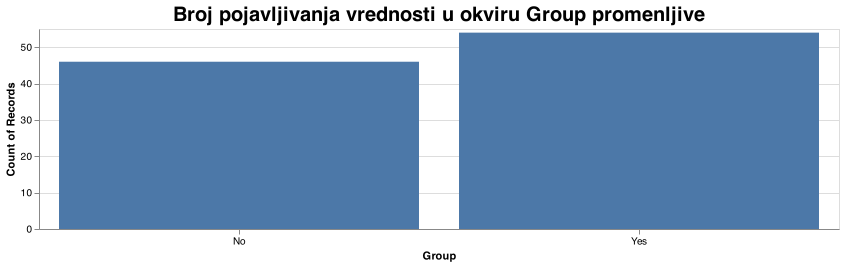

In [176]:
df |> @vlplot(
    mark = :bar,
    x = {:Group, axis = {labelAngle = 0}},
    y = "count()",
    title = {text = "Broj pojavljivanja vrednosti u okviru Group promenljive", fontSize = 20},
    width = 800,
    heigth = 800
)

Ukoliko navedemo color parametar i prosledimo mu naziv promenljive čije vrednosti "prebrojavamo", VegaLite biblioteka će se potruditi da svakom štapiću unutar bar grafika dodeli različitu boju i na desnoj strani grafika prikazati legendu sa oznakama koja boja kojoj klasi odnosno vrednosti pripada.

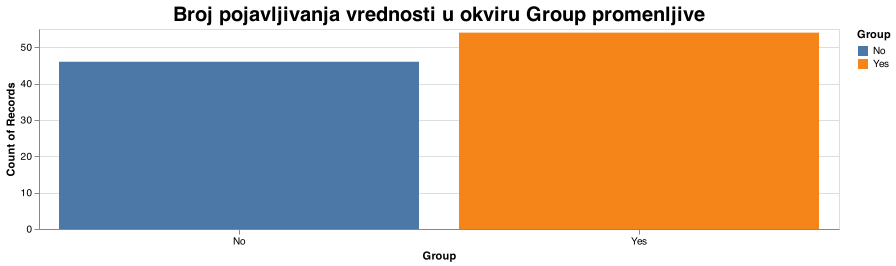

In [177]:
df |> @vlplot(
    mark = :bar,
    x = {:Group, axis = {labelAngle = 0}},
    y = "count()",
    title = {text = "Broj pojavljivanja vrednosti u okviru Group promenljive", fontSize = 20},
    color = {"Group"},
    width = 800,
    heigth = 800
)

Ukoliko želimo da eksplicitno navedemo boje štapića u okviru bar grafika, to možemo učiniti navođenjem naziva boja u okviru range parametra, kao što je prikazano u kodu ispod.

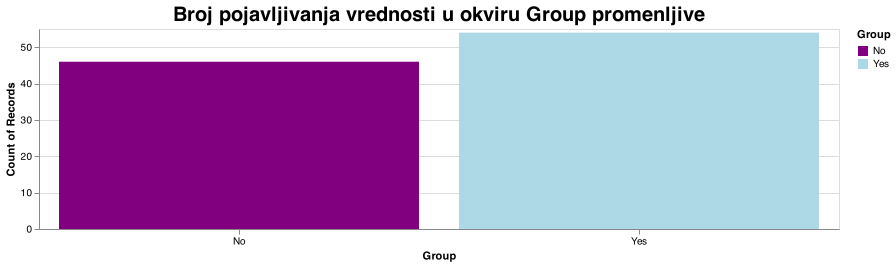

In [180]:
df |> @vlplot(
    mark = :bar,
    x = {:Group, axis = {labelAngle = 0}},
    y = "count()",
    title = {text = "Broj pojavljivanja vrednosti u okviru Group promenljive", fontSize = 20},
    color = {"Group", scale = {range = ["purple", "lightblue"]}},
    width = 800,
    heigth = 800
)

### <center> Histogram </center>

U primeru ispod demonstrirana je mogućnost biblioteke VegaLite da generiše histograme. U navedenom primeru, putem histograma, prikazana je frekvencija pojavljivanja kontinualnih vrednosti po intervalima u okviru promenljive Dependent DataFrame-a koji smo kreirali. Histogram se kreira navodeći :bar simbol koji se prosleđuje mark parametru @vlplot makroa, ali se u parametru x u njegovom podparametru bin prosleđuje vrednost true, što predstavlja naznaku da želimo histogram umesto bar grafičkog prikaza.

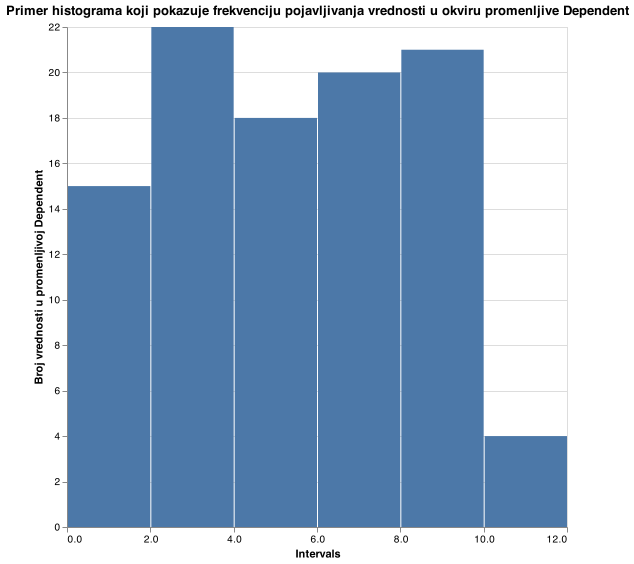

In [123]:
df |> @vlplot(
    mark = :bar,
    x = {:Dependent, bin = true, axis = {title = "Intervals"}},
    y = {"count()", axis = {title = "Broj vrednosti u promenljivoj Dependent"}},
    title = "Primer histograma koji pokazuje frekvenciju pojavljivanja vrednosti u okviru promenljive Dependent", 
    width = 500,
    height = 500
)

U primeru histograma iznad, VegaLite biblioteka "sama" određuje broj intervala koje će prikazati. Mi možemo navesti željeni broj intervala tako što podparametru maxbins parametra bin dodelimo željenu celobrojnu vrednost. U primeru ispod, naveden je broj 3, tako da će VegaLite biblioteka na grafiku prikazati broj pojavljivanja vrednosti u okviru Dependent promenljive u okviru 3 intervala. 

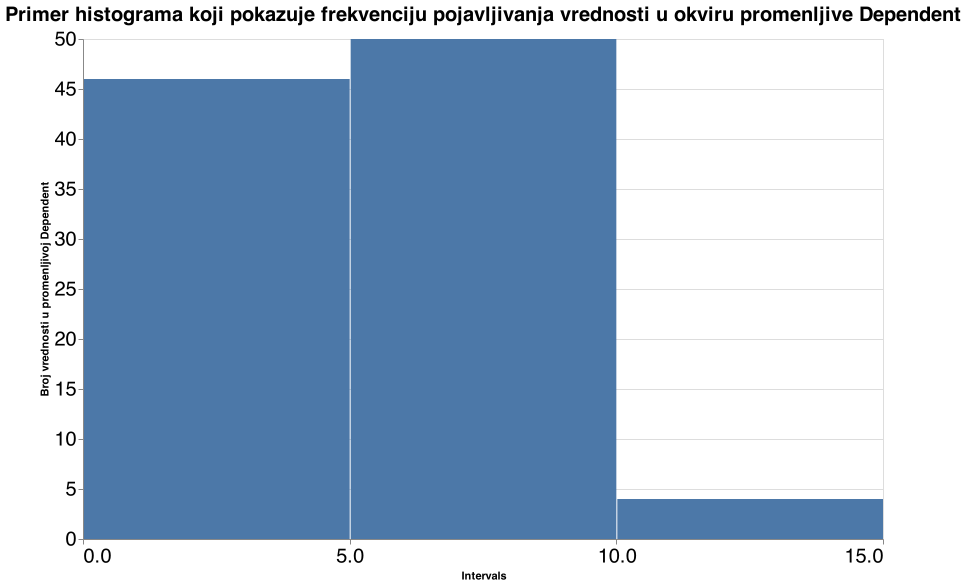

In [162]:
df |> @vlplot(
    mark = :bar,
    x = {:Dependent, bin = {maxbins = 3}, axis = {title = "Intervals", labelFontSize = 20}},
    y = {"count()", axis = {title = "Broj vrednosti u promenljivoj Dependent", labelFontSize = 20}},
    title = {text = "Primer histograma koji pokazuje frekvenciju pojavljivanja vrednosti u okviru promenljive Dependent", fontSize = 20}, 
    width = 800,
    height = 500
)

### <center> Box grafik </center>

Box grafik je pogodan za vizuelno predstavljanje distribucije vrednosti u okviru kontinualne promenljive u odnosu "pet vrednosti". Ove vrednosti su: 
- 25. percentil, odnosno prvi kvartal
- 50. percentil, odnosno drugi kvartal (što je ujedno i medijan),
- 75. percentil, odnosno treći kvartal,
- minimum koji se dobija tako što se od 25. percentila oduzme međukvartalna razlika (razlika 75. i 25. percentila) uvećana 1.5 puta (određeno parametrom extent u kodu ispod) i
- maksimum koji se dobija tako što se 75. percentilu doda međukvartlna razlika
Minimum i maksimum određuju donji, odnosno gornji "brk" grfika. Sve vrednosti koje su manje od minimuma ili veće od maksimuma smatraju se elementima van granica koje odstupaju od standarda.

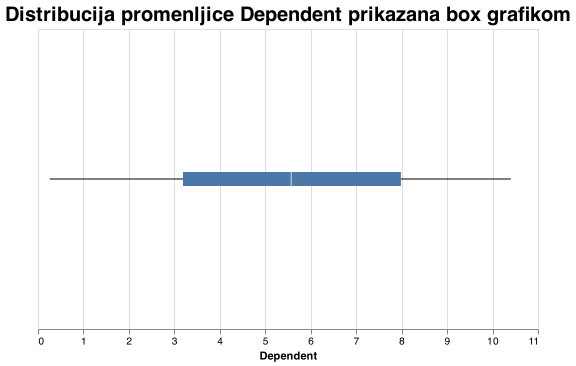

In [172]:
df |> @vlplot(
    mark = {:boxplot, extent = 1.5},
    x = :Dependent,
    title = {text = "Distribucija promenljice Dependent prikazana box grafikom", fontSize = 20},
    width = 500,
    height = 300
)

Ukoliko želimo da je grafik orijentisan vertikalno umesto horizontalno, to možemo postići minimalnom izmenom koda prikazanom u ćeliji iznad (tako što ćemo samo parametar x zameniti parametrom y).

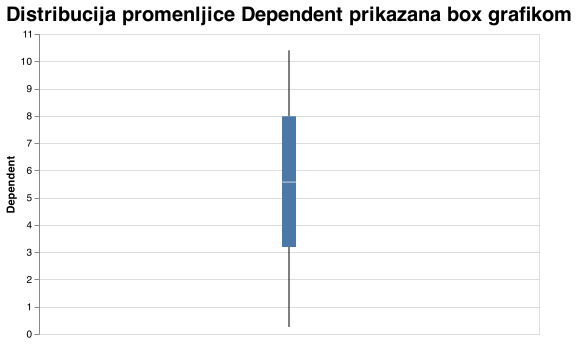

In [174]:
df |> @vlplot(
    mark = {:boxplot, extent = 1.5},
    y = :Dependent,
    title = {text = "Distribucija promenljive Dependent prikazana box grafikom", fontSize = 20},
    width = 500,
    height = 300
)

Box grafik je takođe koristan da prikaže distribuciju vrednosti koje se javljaju u okviru kontinualne promenljive u odnosu na neku kategoričku promenljivu. Kod prikazan u ćeliji ispod upravo demonstrira jednu ovakvu situaciju. U DataFrame-u koji smo kreirali sadrži Group kategoričku promenljivu. Grafik prikazuje distribuciju kontinualne vrednosti Dependent u odnosu na vrednost Group. Budući da se u promenljivoj Group nalaze samo dve različite vrednosti, na grafiku ispod su prikazana samo dva box grafika.

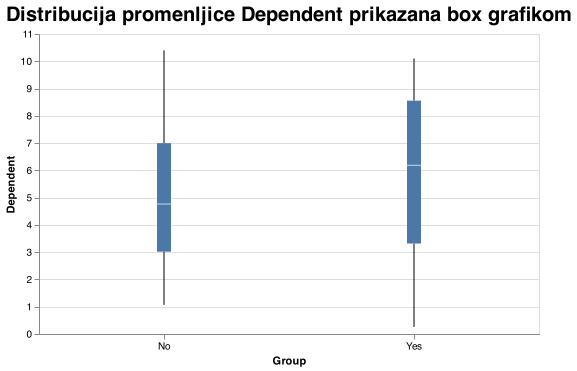

In [181]:
df |> @vlplot(
    mark = {:boxplot, extent = 1.5},
    x = {:Group, axis = {labelAngle = 0}},
    y = :Dependent,
    title = {text = "Distribucija promenljice Dependent prikazana box grafikom", fontSize = 20},
    width = 500,
    height = 300
)

U primeru ispod demonstrirana je primena agregacione funkcije mean koja traži srednju vrednost promenljive Dependent. U konkretnom primeru u parametru x je navedeno da želimo da grupišemo opservacije DataFrame-a na osnovu vrednosti promenljive Group. Prosleđivanjem :Dependent atributa promenljivoj y i stringa mean parametru aggregate, naznačili smo da želimo da se primeni traženje srednje vrednosti kao funkcija agregacije. U osnovi, VegaLite biblioteka će izvršiti grupisanje svih promenljivih koje imaju vrednost "Yes" atributa Group u jedan DataFrame, kao i grupisanje svih promenljivih koje kao vrednost imaju "No" u koloni Group u drugi DataFrame objekat. Nakon toga, primeniće se mean funkcija na kolonu Dependent svakog DataFrame-a individualno. 
Budući da box grafik prikazan u ćeliji iznad nije prikazao postojanje elemenata van granica, očekuje se da srednja vrednost i medijan budu približno jednaki.

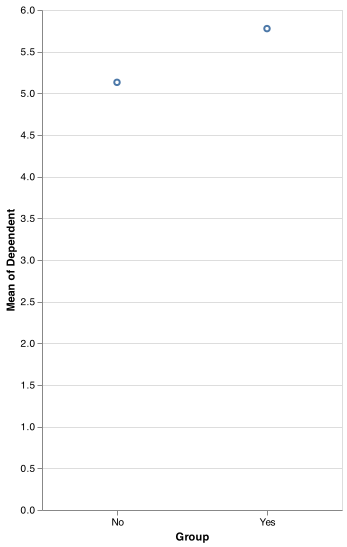

In [186]:
df |> @vlplot(
    mark = :point,
    x = {:Group, axis = {labelAngle = 0}},
    y = {:Dependent, type = :quantitative, aggregate = "mean"},
    width = 300,
    height = 500 
)

### <center> Grafik koji aproksimira funkciju gustine verovatnoće </center>

Prosleđivanjem atributa :area parametru mark makroa @vlplot, biblioteka VegaLite iscrtava grafik koji aproksimira funkciju gustine verovatnoće prosleđene promenljive. Kao što možemo videti na grafiku ispod, promenljiva Dependent sledi normalnu raspodelu, budući da prikazana kriva ima oblik Gausove krive.

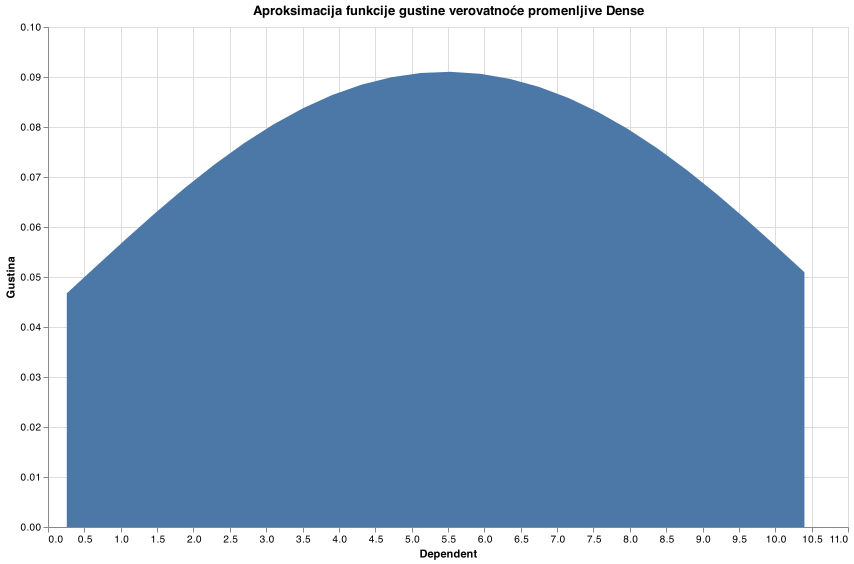

In [195]:
df |> @vlplot(
    mark = :area,
    x = {"value:q", title = "Dependent"},
    y = {"density:q", title = "Gustina"},
    transform = [{density = "Dependent", bandwidth = 3.0}],
    title = "Aproksimacija funkcije gustine verovatnoće promenljive Dense",
    width = 800,
    height = 500
)

Grafikom koji vrši aproksimaciju gustine verovatnoće željene numeričke promenljive možemo predstaviti krive gustina verovatnoća promenljivih u odnosu na neku kategoričku promenljivu, baš kao što je prikazano kodom u ćelliji ispod.

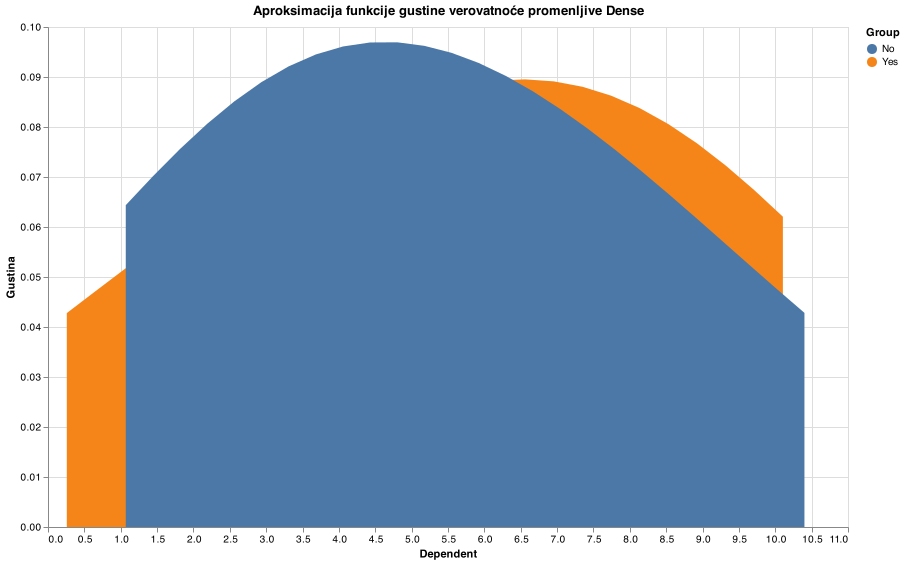

In [197]:
df |> @vlplot(
    mark = :area,
    x = {"value:q", title = "Dependent"},
    y = {"density:q", title = "Gustina"},
    transform = [{density = "Dependent", bandwidth = 3.0, groupby = ["Group"]}],
    title = "Aproksimacija funkcije gustine verovatnoće promenljive Dense",
    color = "Group:n",
    width = 800,
    height = 500
)

Ukoliko navedemo da je vrednost opacity parametra manja od 1.0, dobijamo pregledniji prikaz krivih linija gustine verovatnoće kontinualne promenljive u odnosu na navedenu kategoričku promenljivu.

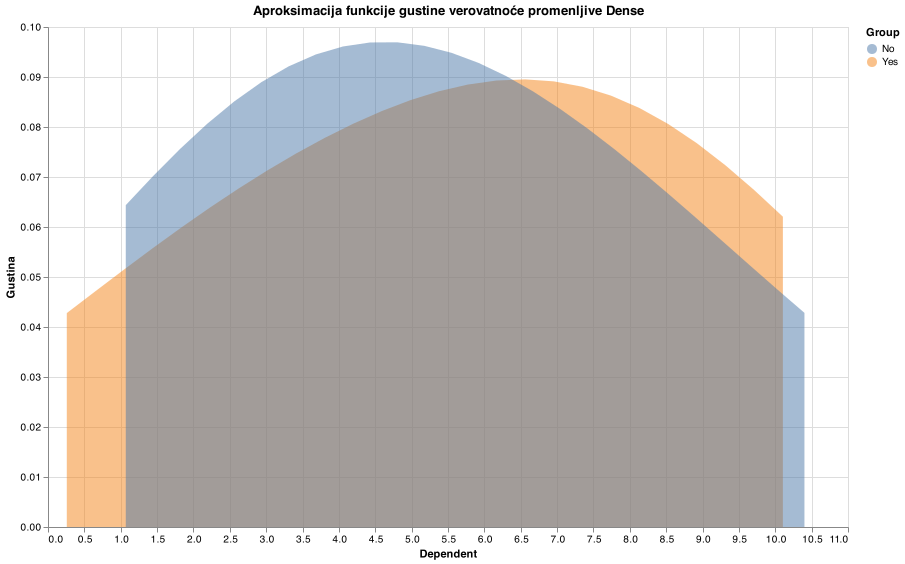

In [199]:
df |> @vlplot(
    mark = :area,
    x = {"value:q", title = "Dependent"},
    y = {"density:q", title = "Gustina"},
    transform = [{density = "Dependent", bandwidth = 3.0, groupby = ["Group"]}],
    title = "Aproksimacija funkcije gustine verovatnoće promenljive Dense",
    color = "Group:n",
    opacity = {value = 0.5},
    width = 800,
    height = 500
)